In [1]:
from main import *
import matplotlib.pyplot as plt
import time 

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [118]:
# add new input ports
# figure out more efficient starting point

In [55]:
population, score_evolution = run_simulation(generations=5, population_size=30, mutations_per_division=2, retall=True)

Generation  0 required 55 divisions to repopulate
Generation  1 required 30 divisions to repopulate
Generation  2 required 33 divisions to repopulate
Generation  3 required 33 divisions to repopulate
Generation  4 required 24 divisions to repopulate


In [35]:
cell = Cell(1, permanent_genes=2)
_, mutant = cell.divide(num_mutations=2)

# only accept cells in which the output is dependent upon the input, and a stable steady state is achieved
connected = interaction_check_topographical(mutant, input_=2, output=1)
stable = check_stability(mutant, 1, input_=2, dt=1)
if connected is True and stable is True:
    print('accepted')

accepted


[1764.8395439783867, 144647221.73416638]

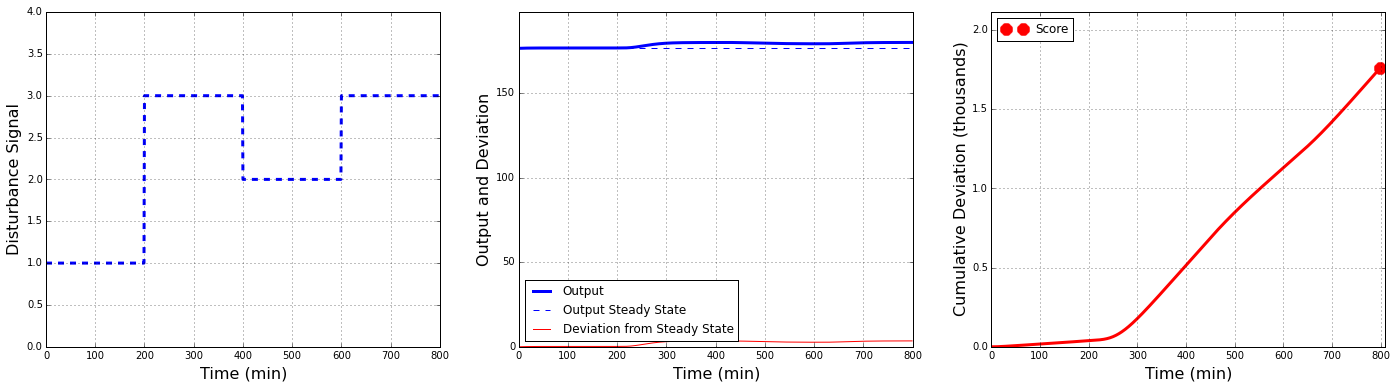

In [60]:
get_fitness_2(population[0], plot=True)

In [48]:
# list reactions
for rxn in cell.reactions:
    if rxn.rxn_type not in ['transcription', 'translation', 'mrna_decay', 'protein_decay']:
        print(rxn.rxn_type, rxn.reactants, rxn.products)

# list activation/repression edges
for mod in cell.rate_mods:
    print(mod.mod_type, mod.substrate, mod.target)

catalytic_degradation [1, 3] []
activation 3 0


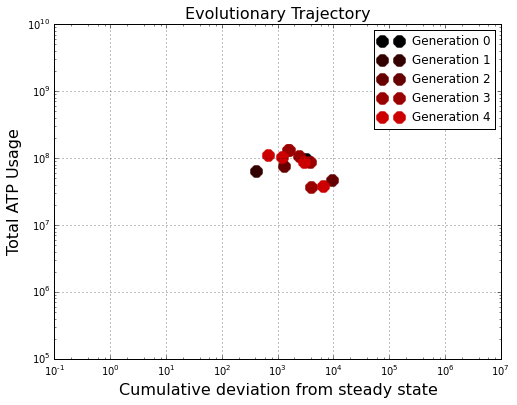

In [56]:
# ax1 = plot_1D_trajectory(score_evolution, obj=0)
ax2 = plot_2D_trajectory(score_evolution, obj=(0, 1))
ax2.set_xlim(1e-1, 1e7)
ax2.set_ylim(1e5, 1e10)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.set_ylabel('Total ATP Usage')
ax2.set_xlabel('Cumulative deviation from steady state')

In [35]:
# import pickle as pickle
# pickle.dump(population, open( "population.p", "wb" ) )
# pickle.dump(score_evolution, open( "score_evolution.p", "wb" ) )